Looking at Spx returns if first day of month is down more than 1%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.tseries.offsets import BDay

%matplotlib inline
plt.rcParams.update({"figure.figsize":"16, 9", "grid.alpha":"0.21"})
plt.style.use("seaborn-whitegrid")

In [6]:
# Spx since 1950’s
# https://finance.yahoo.com/quote/^GSPC/history?period1=-630986400&period2=1516572000&interval=1d&filter=history&frequency=1d
spx = pd.read_csv("../Data/^GSPC.csv", index_col="Date")
spx.index = pd.to_datetime(spx.index, format="%Y-%m-%d")
spx["pct"] = spx["Close"].pct_change()
spx["month"] = spx.index.month
spx["day"] = spx.index.day

Separating instances where Spx was below or above 50ema at month start

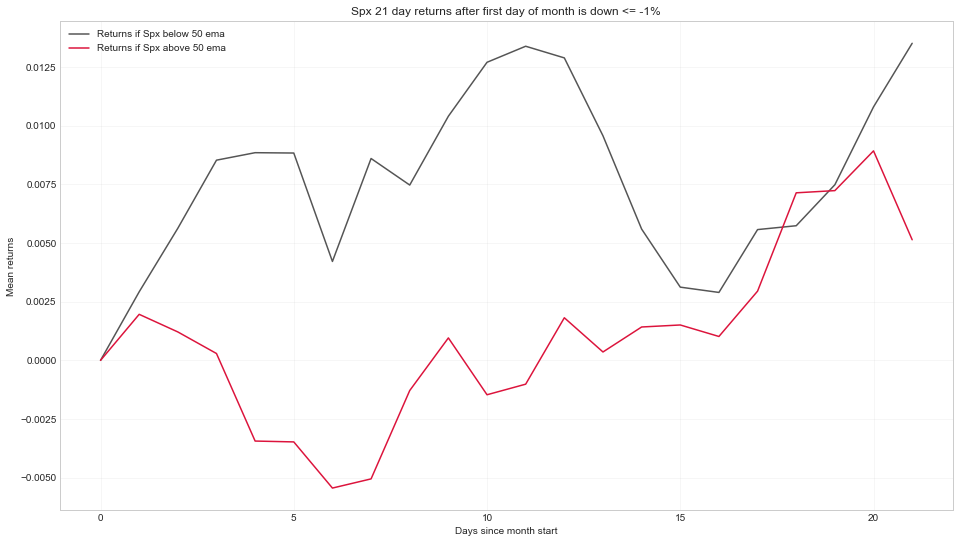

In [7]:
events = spx[(spx["day"] == 1) & (spx["pct"] < -0.01)]
ma50 = spx["Close"].ewm(50).mean()
means_below50 = pd.DataFrame()
means_above50 = pd.DataFrame()

for index, row in events.iterrows():
    sdate = index
    edate = index + BDay(21)
    rets = spx["pct"].loc[sdate:edate]
    rets.iloc[0] = 0
    rets.reset_index(drop=True, inplace=True)
        
    if spx["Close"].loc[sdate] < ma50.loc[sdate]:
        means_below50[index] = rets
        #plt.plot(rets.cumsum(), color="#555555", alpha=0.21)
    else:
        means_above50[index] = rets
        #plt.plot(rets.cumsum(), color="g", alpha=0.21)
        
means_below50 = means_below50.mean(axis=1).cumsum()
means_above50 = means_above50.mean(axis=1).cumsum()
plt.plot(means_below50, color="#555555", label="Returns if Spx below 50 ema")
plt.plot(means_above50, color="crimson", label="Returns if Spx above 50 ema")
plt.title("Spx 21 day returns after first day of month is down <= -1%")
plt.xlabel("Days since month start")
plt.ylabel("Mean returns")
plt.legend(loc="upper left")

Thanks for your time